In [2]:
import psycopg2
dbStr = "dbname='{dbname}' user='{user}' host='{host}' password='{password}'"
dbCre = {'dbname':'CustomerFlow','user':'hao','host':'localhost','password':'520'}
try:
    conn = psycopg2.connect(dbStr.format(**dbCre))
except:
    print "I am unable to connect to the database"


In [77]:
import pandas as pd
import matplotlib.pyplot as plt
#pdf_pay = pd.read_sql_query("select * from user_pay where shop_id=23;",conn)
pdf_view = pd.read_sql_query("select * from user_view where shop_id=247;",conn)

In [32]:
pdf_view['day'] = pdf_view.apply(lambda row:row['time_stamp'].date(),axis=1)
tmp = pdf_view['day'].value_counts()
ttt = pd.date_range(min(tmp.index),max(tmp.index))
tmp = tmp.reindex(ttt, fill_value=0)
pdf_pay = pd.read_csv('../Analysis/PayTrend/CustomerFlow_23.csv',names=['customerFlow'],index_col=0)
pdf_pay.index = pd.to_datetime(pdf_pay.index)

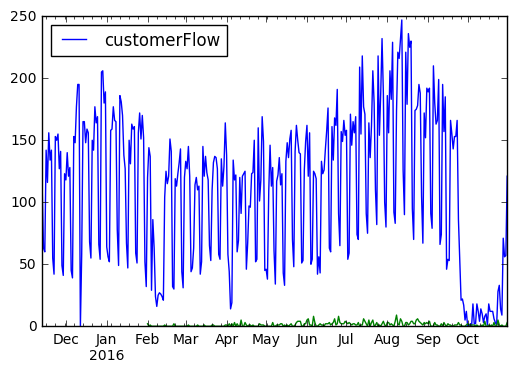

In [35]:
pdf_pay.plot()
tmp.plot()
plt.show()

In [48]:
tmp = pd.DataFrame(tmp)

In [66]:
pdf_pay['customerFlow'].values

array([112,  63,  60, 142, 116, 156, 134, 142,  55,  42, 153, 150, 155,
       127, 141,  49,  41, 123, 118, 140, 121, 128,  45,  39, 153, 148,
       177, 195, 195,   0,  58, 165, 165, 148, 159, 156,  68,  55, 150,
       142, 177, 164, 169,  66,  54, 205, 206, 180, 189,  64,  56,  52,
       158, 159, 177, 166, 165,  78,  49, 186, 181, 170, 138, 127,  67,
        47, 150, 131, 163, 159, 161,  59,  51, 156, 172, 151, 170, 152,
        52,  32, 120, 144, 137,  29,  86,  63,  24,  16,  25,  27,  26,
        24,  21, 104, 125, 115, 121, 151, 141,  32,  30, 119, 113, 123,
       132, 143,  44,  31, 120, 133, 127, 145, 121,  44,  47,  63, 114,
       120, 110, 113,  42,  52, 145, 121, 137, 124, 118,  65,  53, 110,
       132, 137, 136, 127,  58,  54, 135, 113, 129, 164, 138,  58,  44,
        14,  19, 134, 118, 122,  60,  69, 120,  91, 121, 123, 125,  46,
        67,  97,  96, 123, 124, 150,  52,  54, 160, 101, 118, 169, 149,
        45,  46,  38, 109, 146, 113, 128,  61,  34, 117, 122, 13

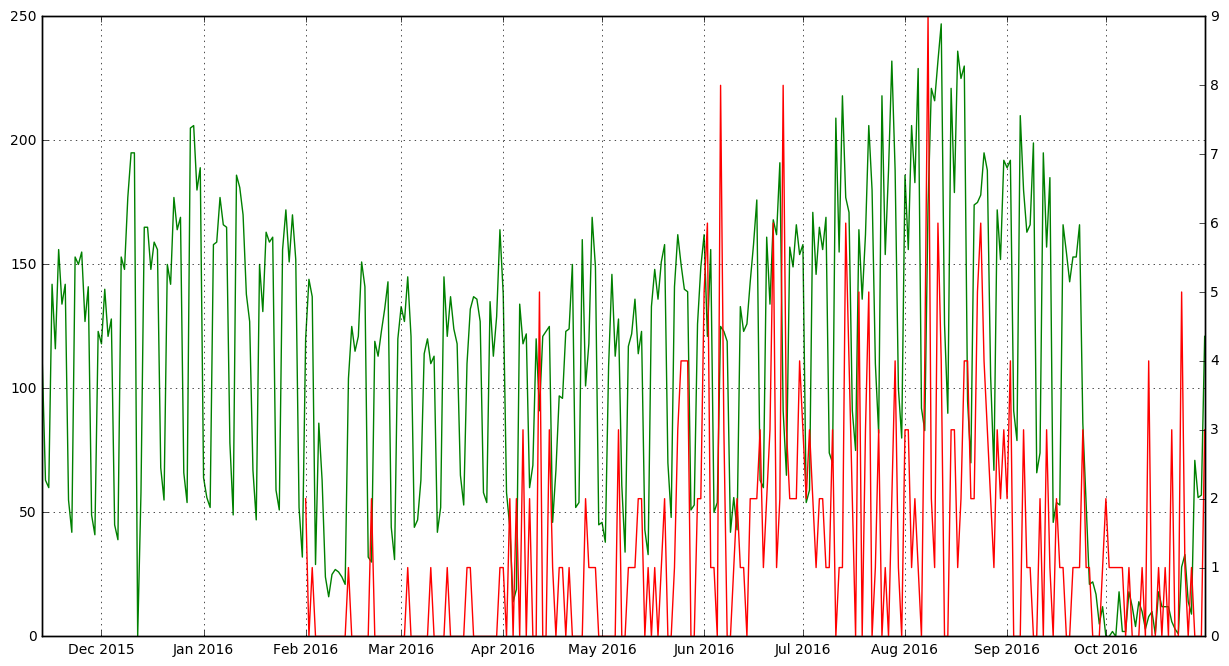

In [76]:
fig, plotXY = plt.subplots(1, sharex = True,figsize=(15,8))
plotXY.plot(pdf_pay.index.values, pdf_pay['customerFlow'].values,'g.')
#plotXY[0].set_ylabel(feature)
#plotXY[0].set_title(title_set)
plotXY.grid()           
#plotXY[0].plot(data_draw_x, data[feature + '_mean_200'], color = 'r', label = 'sliding mean 200')            
plot2 = plotXY.twinx()
#s2 = data[maintenance_code]
plot2.plot(tmp.index.values, tmp['customerFlow'].values, 'r.')
#plot2.set_ylim(plot2.get_ylim()[::1])
#plot2.set_ylabel('Number of Maintenance', color = 'g')
plt.show()



In [253]:
shopIds = pd.read_sql_query('select distinct shop_id from user_pay;',conn)

In [277]:
a= shopIds.iloc[:,0]
b =a.values
b.sort()
b

array([   1,    2,    3, ..., 1998, 1999, 2000])

In [207]:
pdf_pay['day'] = pdf_pay.apply(lambda row:row['time_stamp'].date(),axis=1)
pdf_pay

,id,user_id,shop_id,time_stamp,day
0,51725449,616007,23,2016-05-23 15:00:00,2016-05-23
1,51725450,16181688,23,2016-02-25 08:00:00,2016-02-25
2,51725451,616007,23,2015-11-27 14:00:00,2015-11-27
3,51725452,616007,23,2015-11-13 18:00:00,2015-11-13
4,51725453,616007,23,2016-02-22 12:00:00,2016-02-22
5,51725454,616007,23,2016-03-15 14:00:00,2016-03-15
6,51725455,616007,23,2016-02-22 12:00:00,2016-02-22
7,51725456,616007,23,2016-05-19 11:00:00,2016-05-19
8,51725457,19070570,23,2016-08-01 08:00:00,2016-08-01
9,51725458,19070570,23,2016-06-22 10:00:00,2016-06-22


In [281]:
tmp = pdf_pay['day'].value_counts()
ttt = pd.date_range(min(tmp.index),max(tmp.index))
tmp = tmp.reindex(ttt, fill_value=0)


In [282]:
tmp.to_csv("teset.csv")

In [215]:
tmp[tmp.index.sort_values()]

2015-11-13    112
2015-11-14     63
2015-11-15     60
2015-11-16    142
2015-11-17    116
2015-11-18    156
2015-11-19    134
2015-11-20    142
2015-11-21     55
2015-11-22     42
2015-11-23    153
2015-11-24    150
2015-11-25    155
2015-11-26    127
2015-11-27    141
2015-11-28     49
2015-11-29     41
2015-11-30    123
2015-12-01    118
2015-12-02    140
2015-12-03    121
2015-12-04    128
2015-12-05     45
2015-12-06     39
2015-12-07    153
2015-12-08    148
2015-12-09    177
2015-12-10    195
2015-12-11    195
2015-12-13     58
             ... 
2016-09-29      5
2016-09-30     12
2016-10-03      2
2016-10-05     18
2016-10-06      2
2016-10-07      2
2016-10-08     18
2016-10-09     12
2016-10-10      4
2016-10-11     14
2016-10-12     10
2016-10-13      3
2016-10-14      8
2016-10-15     10
2016-10-16      1
2016-10-17     18
2016-10-18     12
2016-10-19     12
2016-10-20     12
2016-10-21      6
2016-10-22      3
2016-10-23      1
2016-10-24     28
2016-10-25     33
2016-10-26

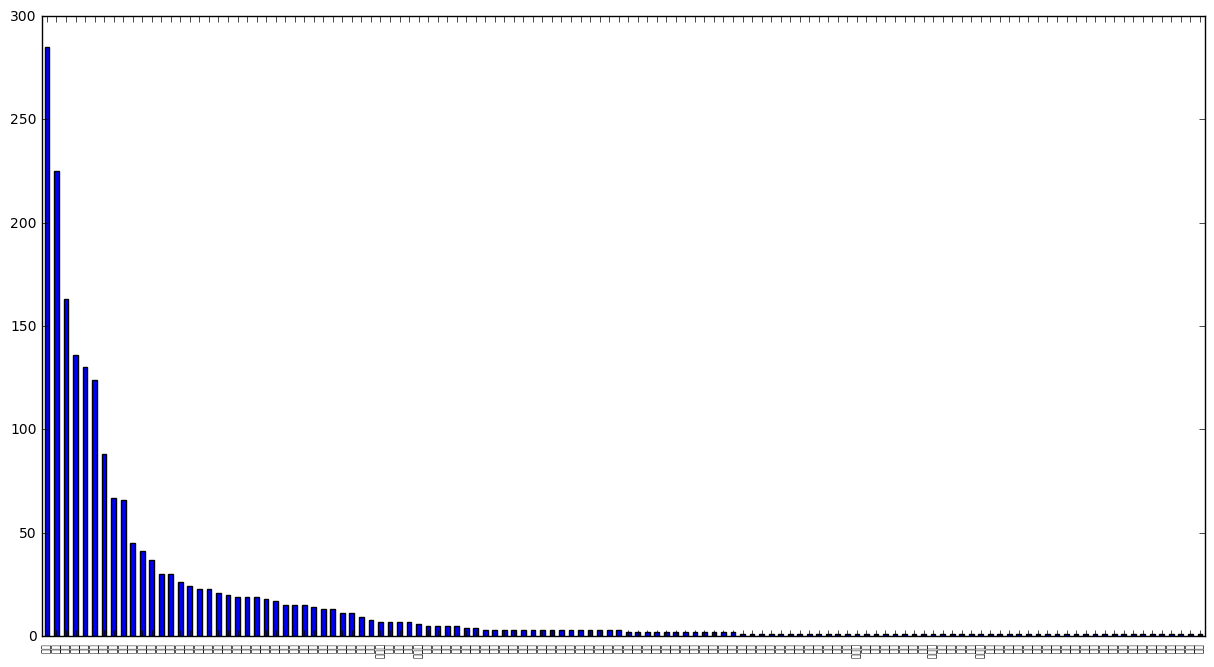

In [124]:
from matplotlib import font_manager
import matplotlib
#matplotlib.rc('font', family='Arial')
fontP = font_manager.FontProperties(fname='/usr/share/fonts/truetype/openoffice/opens___.ttf')
#fontP.set_family('SimHei')
#fontP.set_size(14)

shop_info = '../shop_info.txt'
shop_info = pd.read_csv(shop_info,header=None,names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'])
city_cnt = shop_info['city_name'].value_counts()
#plt.figure(figuresize=(15,8))
ax = city_cnt.plot.bar(figsize=(15,8))
ax.set_xticklabels(city_cnt.index.str.decode('utf-8'),fontproperties=fontP)
#plt.legend(prop=fontP)
plt.show()

In [212]:
shop_info = '../shop_info.txt'
shop_info = pd.read_csv(shop_info,header=None,names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'])
city_cnt1 = shop_info['city_name'].value_counts()
len(city_cnt1)

122

In [179]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
from pypinyin import pinyin, lazy_pinyin
def getPinyin(s):
    return reduce(lambda x,y:x+y,map(lambda x :x.capitalize(),lazy_pinyin(s.decode('utf-8')))).encode('utf-8')
def Chinese2Pinyin():
    shop_info = '../shop_info.txt'
    shop_info = pd.read_csv(shop_info,header=None,names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'])
    city_cnt = shop_info['city_name'].value_counts()
    cityName = {}
    for city in city_cnt.index:
        cityPinyin = getPinyin(city)
        cityName[city]=cityPinyin

    cate1Name = {}
    cate1Cnt = shop_info['cate_1_name'].value_counts()
    for cate in cate1Cnt.index:
        catePinyin = getPinyin(cate)
        cate1Name[cate]=catePinyin
        
    cate2Name = {}
    cate2Cnt = shop_info['cate_2_name'].value_counts()
    for cate in cate2Cnt.index:
        catePinyin = getPinyin(cate)
        cate2Name[cate]=catePinyin
        
    cate3Name = {}
    cate3Cnt = shop_info['cate_3_name'].value_counts()
    for cate in cate3Cnt.index:
        catePinyin = getPinyin(cate)
        cate3Name[cate]=catePinyin
    return cityName,cate1Name,cate2Name,cate3Name

def modifyShop_info():
    cityName,cate1Name,cate2Name,cate3Name = Chinese2Pinyin()

    shop_info = '../shop_info.txt'
    with open('../shop_info_pinyin.txt','w') as fw:
        shop_info = open(shop_info,'r')
        for line in shop_info.readlines():
            line = line.strip('\r\n')
            terms = line.split(',')
            if terms[1]!='':
                terms[1] = cityName[terms[1]]
            if terms[7]!='':
                terms[7] = cate1Name[terms[7]]
            if terms[8]!='':
                terms[8] = cate2Name[terms[8]]
            if terms[9]!='':
                terms[9] = cate3Name[terms[9]]
            fw.write(','.join(terms)+'\n')
        shop_info.close()

if __name__=='__main__':
    modifyShop_info()

In [232]:
import pandas as pd

idx = pd.date_range('09-01-2013', '09-30-2013')




DatetimeIndex(['2013-09-01', '2013-09-02', '2013-09-03', '2013-09-04',
               '2013-09-05', '2013-09-06', '2013-09-07', '2013-09-08',
               '2013-09-09', '2013-09-10', '2013-09-11', '2013-09-12',
               '2013-09-13', '2013-09-14', '2013-09-15', '2013-09-16',
               '2013-09-17', '2013-09-18', '2013-09-19', '2013-09-20',
               '2013-09-21', '2013-09-22', '2013-09-23', '2013-09-24',
               '2013-09-25', '2013-09-26', '2013-09-27', '2013-09-28',
               '2013-09-29', '2013-09-30'],
              dtype='datetime64[ns]', freq='D')

In [235]:
s.index = pd.DatetimeIndex(s.index)

In [29]:
from matplotlib import font_manager
import matplotlib
import pandas as pd
shop_info = '../shop_info.csv'
shop_info = pd.read_csv(shop_info,header=None,names=['shop_id','city_name','location_id','per_pay','score','comment_cnt','shop_level','cate_1_name','cate_2_name','cate_3_name'])

In [30]:
tmp = pd.isnull(shop_info['cate_3_name'])
for i in range(len(tmp)):
    if tmp[i] == True:
        shop_info.iloc[i,9] = shop_info.iloc[i,8]
shop_info

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
0,1,湖州,885,8,4.0,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,NaN,NaN,1,超市便利店,超市,超市
2,3,南昌,774,5,3.0,2.0,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,NaN,NaN,1,超市便利店,超市,超市
4,5,杭州,263,2,2.0,2.0,0,美食,休闲食品,生鲜水果
5,6,大连,1139,13,3.0,1.0,0,美食,烘焙糕点,面包
6,7,绍兴,145,13,3.0,9.0,2,美食,快餐,西式快餐
7,8,杭州,234,16,3.0,1.0,0,美食,休闲食品,生鲜水果
8,9,杭州,1120,15,4.0,0.0,1,超市便利店,超市,超市
9,10,孝感,98,10,NaN,NaN,0,超市便利店,超市,超市


In [31]:
scoreisnull = pd.isnull(shop_info['score'])
for i in range(len(scoreisnull)):
    if scoreisnull[i]==True:
        tmpdf = shop_info[(shop_info['city_name']==shop_info['city_name'][i])&(shop_info['location_id']==shop_info['location_id'][i])&(shop_info['per_pay']==shop_info['per_pay'][i])&(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
        if tmpdf.shape[0]!=0:
            shop_info.iloc[i,4]=tmpdf['score'].mean()
        else:
            tmpdf = shop_info[(shop_info['city_name']==shop_info['city_name'][i])&(shop_info['location_id']==shop_info['location_id'][i])&(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
            if tmpdf.shape[0]!=0:
                shop_info.iloc[i,4]=tmpdf['score'].mean()
            else:
                tmpdf = shop_info[(shop_info['city_name']==shop_info['city_name'][i])&(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
                if tmpdf.shape[0]!=0:
                    shop_info.iloc[i,4]=tmpdf['score'].mean()
                else:
                    tmpdf = shop_info[(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
                    if tmpdf.shape[0]!=0:
                        shop_info.iloc[i,4]=tmpdf['score'].mean()
                    else:
                        tmpdf = shop_info[(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
                        if tmpdf.shape[0]!=0:
                            shop_info.iloc[i,4]=tmpdf['score'].mean()
                        else:
                            tmpdf = shop_info[(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
                            if tmpdf.shape[0]!=0:
                                shop_info.iloc[i,4]=tmpdf['score'].mean()
                            else:
                                tmpdf = shop_info[(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
                                if tmpdf.shape[0]!=0:
                                    shop_info.iloc[i,4]=tmpdf['score'].mean()
                                else:
                                    tmpdf = shop_info[\
                          (shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['score']))]
                                    if tmpdf.shape[0]!=0:
                                        shop_info.iloc[i,4]=tmpdf['score'].mean()

In [32]:
shop_info

,shop_id,city_name,location_id,per_pay,score,comment_cnt,shop_level,cate_1_name,cate_2_name,cate_3_name
0,1,湖州,885,8,4.000000,12.0,2,美食,休闲茶饮,饮品/甜点
1,2,哈尔滨,64,19,3.071429,NaN,1,超市便利店,超市,超市
2,3,南昌,774,5,3.000000,2.0,0,美食,休闲茶饮,奶茶
3,4,天津,380,18,3.500000,NaN,1,超市便利店,超市,超市
4,5,杭州,263,2,2.000000,2.0,0,美食,休闲食品,生鲜水果
5,6,大连,1139,13,3.000000,1.0,0,美食,烘焙糕点,面包
6,7,绍兴,145,13,3.000000,9.0,2,美食,快餐,西式快餐
7,8,杭州,234,16,3.000000,1.0,0,美食,休闲食品,生鲜水果
8,9,杭州,1120,15,4.000000,0.0,1,超市便利店,超市,超市
9,10,孝感,98,10,2.625000,NaN,0,超市便利店,超市,超市


In [33]:
scoreisnull = pd.isnull(shop_info['comment_cnt'])
for i in range(len(scoreisnull)):
    if scoreisnull[i]==True:
        tmpdf = shop_info[(shop_info['city_name']==shop_info['city_name'][i])&(shop_info['location_id']==shop_info['location_id'][i])&(shop_info['per_pay']==shop_info['per_pay'][i])&(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
        if tmpdf.shape[0]!=0:
            shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
        else:
            tmpdf = shop_info[(shop_info['city_name']==shop_info['city_name'][i])&(shop_info['location_id']==shop_info['location_id'][i])&(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
            if tmpdf.shape[0]!=0:
                shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
            else:
                tmpdf = shop_info[(shop_info['city_name']==shop_info['city_name'][i])&(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
                if tmpdf.shape[0]!=0:
                    shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
                else:
                    tmpdf = shop_info[(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['cate_3_name']==shop_info['cate_3_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
                    if tmpdf.shape[0]!=0:
                        shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
                    else:
                        tmpdf = shop_info[(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['cate_2_name']==shop_info['cate_2_name'][i])&(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
                        if tmpdf.shape[0]!=0:
                            shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
                        else:
                            tmpdf = shop_info[(shop_info['shop_level']==shop_info['shop_level'][i])&(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
                            if tmpdf.shape[0]!=0:
                                shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
                            else:
                                tmpdf = shop_info[(shop_info['cate_1_name']==shop_info['cate_1_name'][i])\
                          &(shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
                                if tmpdf.shape[0]!=0:
                                    shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()
                                else:
                                    tmpdf = shop_info[\
                          (shop_info['shop_id']!=shop_info['shop_id'][i])&(~pd.isnull(shop_info['comment_cnt']))]
                                    if tmpdf.shape[0]!=0:
                                        shop_info.iloc[i,5]=tmpdf['comment_cnt'].mean()

In [35]:
shop_info.to_csv('../shop_info_filled.csv',index=False)


In [9]:
import pandas as pd
shopInfoFile = "../shop_info_filled.csv"
shopInfoFileDf = pd.read_csv(shopInfoFile)
cate1 = len(list(shopInfoFileDf['location_id'].unique()))
cate1

1159

In [29]:
a=shopInfoFileDf.iloc[0]
b=a[['per_pay', 'score', 'comment_cnt', 'shop_level']]
b.values
a['city_name']

'\xe6\xb9\x96\xe5\xb7\x9e'

In [36]:
b=shopInfoFileDf['cate_3_name'].unique()
for hh in b:
    print hh

饮品/甜点
超市
奶茶
生鲜水果
面包
西式快餐
其它小吃
东北菜
中式快餐
麻辣烫/串串香
粥
蛋糕
便利店
西餐
米粉/米线
川味/重庆火锅
川菜
面点
冰激凌
网吧网咖
其它快餐
咖啡厅
粤菜
其它烘焙糕点
中式烧烤
江浙菜
零食
砂锅/煲类/炖菜
日韩料理
西北菜
其它地方菜
其它休闲食品
药店
海鲜
咖啡
其它火锅
其他餐饮美食
湖北菜
自助餐
美食特产
美容美发
香锅/烤鱼
台湾菜
闽菜
湘菜
熟食
其它烧烤
上海本帮菜
本地购物
个人护理


In [43]:
csvFileName = "../Analysis/PayTrend/CustomerFlow_1.csv"
shopTrend = pd.read_csv(csvFileName, header=None, names=['day', 'cnt'])
shopTrend

,day,cnt
0,2015-10-10,188
1,2015-10-11,272
2,2015-10-12,257
3,2015-10-13,239
4,2015-10-14,277
5,2015-10-15,227
6,2015-10-16,242
7,2015-10-17,293
8,2015-10-18,291
9,2015-10-19,256


In [7]:
import os
import pandas as pd
def getTest(shop_id, lag, is_nozero):
    home = os.path.expanduser('~')
    featureFolderName = ("P_%s_"+"without_zero" if is_nozero else "with_zero")%lag
    file_name = "feature_shop_%s_%s.csv" % (shop_id, "without0" if is_nozero else "with0")
    file_name = os.path.join(home,"Dropbox","dataset","Analysis","Features",featureFolderName,file_name)
    featuredf = pd.read_csv(file_name)
    test = featuredf.iloc[featuredf.shape[0]-14:, :]
    Xtest = test.iloc[:, :test.shape[1]-1]
    Ytest = test.iloc[:, test.shape[1]-1]
    return Xtest,Ytest

In [8]:
Xt,yt = getTest(1,7,True)

In [20]:
tmp=tmp[2:]

In [22]:
list(tmp.values)

[254, 239, 228, 244, 264, 264, 207]